In [1]:
%matplotlib inline
import pandas as pd
import pygwalker

import matplotlib.pyplot as plt

import seaborn as sns
import sklearn
import numpy as np

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from category_encoders import OneHotEncoder
from category_encoders import OrdinalEncoder
from sklearn.tree import DecisionTreeClassifier

from IPython.display import VimeoVideo

from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
# Define the features and target

# wrangling

In [2]:
def wrangle(filename):
    df=pd.read_excel(filename)
    
    #Converting Numerical Data into float 
    df['Gravity (API)'] = df['Gravity (API)'].replace('-', np.nan)

# convert the "Gravity (API)" column to float
    df['Gravity (API)'] = df['Gravity (API)'].astype(float)

    #converting Area 
    df["Area_acres"]=df["Area_acres"].replace("-",np.nan)
    df["Area_acres"]=df["Area_acres"].astype(float)
    
    # Converting tTempratute 
    df["Temprature_F"]=df["Temprature_F"].replace("-",np.nan)
    df["Temprature_F"]=df["Temprature_F"].astype(float)

    # converting porositry 
    df["Porosity_%"]=df["Porosity_%"].replace("-",np.nan)
    df["Porosity_%"]=df["Porosity_%"].astype(float)
    
    df["permeability_md"]=df["permeability_md"].replace("-",np.nan)
    df["permeability_md"]=df["permeability_md"].astype(float) 
    
    
    #viscosity
    #renaming the column
    df = df.rename(columns={"Viscosity_cp ": "Viscosity_cp"})
    df["Viscosity_cp"]=df["Viscosity_cp"].replace("-",np.nan)
    df["Viscosity_cp"]=df["Viscosity_cp"].astype(float)
    #saturation
    df["sat_%_100"]=df["sat_%_100"].replace("-",np.nan)
    df["sat_%_100"]=df["sat_%_100"].astype(float)
    #dropping Unnecessary columns
    df.drop(columns=["Unnamed: 0","Unnamed: 12","Unnamed: 13","Country"],inplace=True)
    # removing  "_from the eor method column"
    df.replace("-","",regex=True)
    df["EOR_method"]=df["EOR _method"].str.replace("_","",regex=True)
    df.drop(columns="EOR _method",inplace=True)
    #Imputing Missing Values with mean 
    df[["Area_acres", 'permeability_md',"Viscosity_cp","Temprature_F","Gravity (API)","sat_%_100"]] = df[["Area_acres", "permeability_md","Viscosity_cp","Temprature_F","Gravity (API)","sat_%_100"]].fillna(df[["Area_acres","permeability_md","Viscosity_cp","Temprature_F","Gravity (API)","sat_%_100"]].median())
    # chaniging into string
    df['Formation '] = df['Formation '].str.replace(".","",regex=True)
    df['Formation '] = df['Formation '].str.replace("/","or",regex=True)
    #df['sat_%_100'] = df['sat_%_100'].astype(float)
    df["Formation "] = df["Formation "].astype("category")


    

    
    return df

In [3]:
df= wrangle(r"C:\Users\Hp\Downloads\final updated9(1).xlsx")

In [4]:
df["Formation "].value_counts()

S               329
Dolo            115
Carb             70
Sh               65
LS               64
US               35
Tripol           34
Cong             30
LS or Dolo        9
LSDolo            2
L                 1
DoloorTripol      1
LSorDolo          1
Dolo or S         1
SS                1
Congl             1
SorLS-Dolo        1
Name: Formation , dtype: int64

In [5]:
df.dropna(inplace=True)

# after adding synthetic data pychart

In [6]:
# Target Values before Over Sampling 
import matplotlib.pyplot as plt

<Axes: ylabel='EOR_method'>

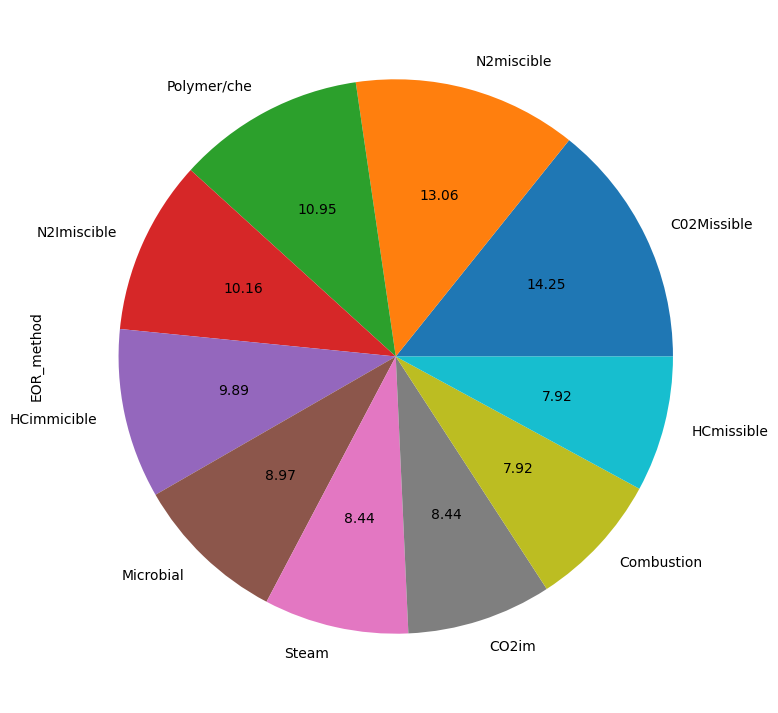

In [7]:
ax=plt.subplot()
df["EOR_method"].value_counts().plot.pie(autopct="%.2f", figsize=(9, 9))

In [8]:
# cheking unique values in dataframe
for col in df.columns:
    print(col,len((df[col].unique())),"label")

Area_acres 397 label
Formation  17 label
Porosity_% 228 label
permeability_md 367 label
Depth_ft 309 label
Gravity (API) 219 label
Viscosity_cp 202 label
Temprature_F 172 label
sat_%_100 145 label
EOR_method 10 label


In [9]:
df.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area_acres       758 non-null    float64 
 1   Formation        758 non-null    category
 2   Porosity_%       758 non-null    float64 
 3   permeability_md  758 non-null    float64 
 4   Depth_ft         758 non-null    int64   
 5   Gravity (API)    758 non-null    float64 
 6   Viscosity_cp     758 non-null    float64 
 7   Temprature_F     758 non-null    float64 
 8   sat_%_100        758 non-null    float64 
 9   EOR_method       758 non-null    object  
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 60.6+ KB


In [10]:
df.head()

,Area_acres,Formation,Porosity_%,permeability_md,Depth_ft,Gravity (API),Viscosity_cp,Temprature_F,sat_%_100,EOR_method
0,4500.0,US,35.0,2700.0,850,135.0,1900.0,95.0,75.0,Steam
1,30.0,S,60.0,1.0,1400,28.0,6.0,110.0,45.0,Steam
2,1000.0,S,32.0,750.0,3500,9.0,15000.0,155.0,55.0,Steam
3,550.0,S,32.0,1350.0,12375,125.0,21000.0,91.0,60.0,Steam
4,260.0,S,34.0,800.0,825,95.0,19750.0,84.0,55.0,Steam


# cheking correlation

In [11]:


#correlation=df.select_dtypes("number").drop(columns="EOR _method").corr()
correlation= df.select_dtypes("number").corr()
correlation

,Area_acres,Porosity_%,permeability_md,Depth_ft,Gravity (API),Viscosity_cp,Temprature_F,sat_%_100
Area_acres,1.000000,-0.026915,-0.190367,0.259332,-0.154104,-0.093752,0.248816,0.045580
Porosity_%,-0.026915,1.000000,0.072161,0.052698,0.569283,-0.064526,0.021306,0.468458
permeability_md,-0.190367,0.072161,1.000000,-0.332228,0.103745,0.167643,-0.013109,-0.047861
Depth_ft,0.259332,0.052698,-0.332228,1.000000,-0.036092,-0.196682,0.704799,-0.058015
Gravity (API),-0.154104,0.569283,0.103745,-0.036092,1.000000,-0.102102,-0.170448,0.312848
Viscosity_cp,-0.093752,-0.064526,0.167643,-0.196682,-0.102102,1.000000,-0.152647,-0.053258
Temprature_F,0.248816,0.021306,-0.013109,0.704799,-0.170448,-0.152647,1.000000,0.171886
sat_%_100,0.045580,0.468458,-0.047861,-0.058015,0.312848,-0.053258,0.171886,1.000000


<Axes: >

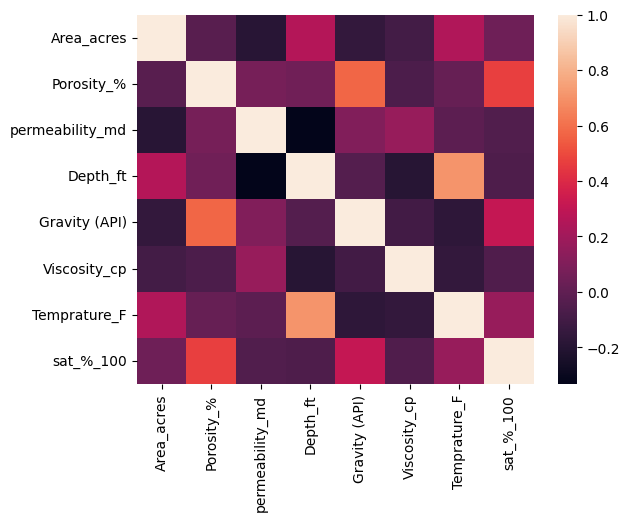

In [12]:
sns.heatmap(correlation)

In [13]:

df[["Area_acres", 'permeability_md',"Viscosity_cp","Temprature_F","Gravity (API)"]] = df[["Area_acres", "permeability_md","Viscosity_cp","Temprature_F","Gravity (API)"]].fillna(df[["Area_acres","permeability_md","Viscosity_cp","Temprature_F","Gravity (API)" ]].mean())

In [14]:
df.isna().sum()# 

Area_acres         0
Formation          0
Porosity_%         0
permeability_md    0
Depth_ft           0
Gravity (API)      0
Viscosity_cp       0
Temprature_F       0
sat_%_100          0
EOR_method         0
dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]),
 [Text(0, 0, 'Steam'),
  Text(1, 0, 'Microbial'),
  Text(2, 0, 'Polymer/che'),
  Text(3, 0, 'N2Imiscible'),
  Text(4, 0, 'C02Missible'),
  Text(5, 0, 'CO2im'),
  Text(6, 0, 'Combustion'),
  Text(7, 0, 'HCmissible'),
  Text(8, 0, 'N2miscible'),
  Text(9, 0, 'HCimmicible')])

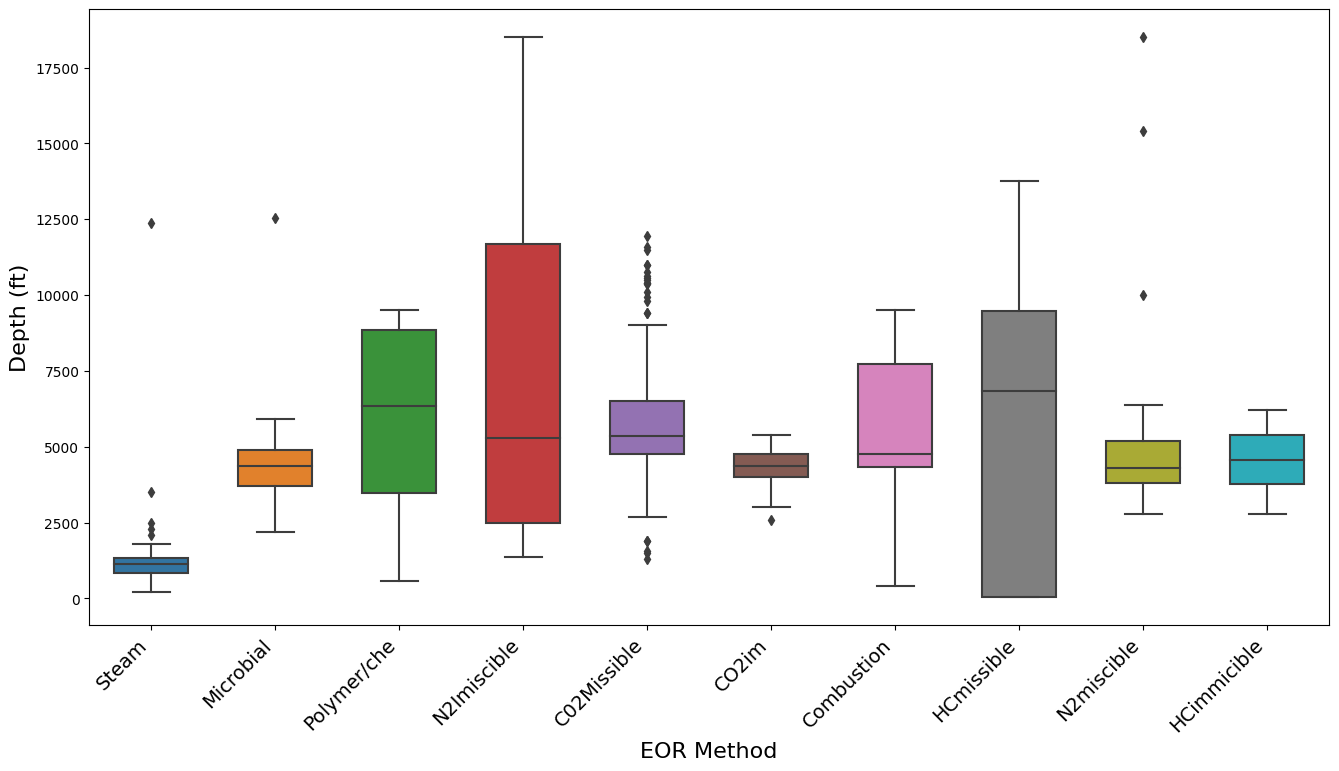

In [15]:

# create a larger figure
plt.figure(figsize=(16, 8))

# create the boxplot with wider spacing between boxes
sns.boxplot(x="EOR_method", y="Depth_ft", data=df, ax=plt.gca(), width=0.6, linewidth=1.5)

# add x-axis label
plt.xlabel("EOR Method", fontsize=16)

# add y-axis label
plt.ylabel("Depth (ft)", fontsize=16)

# adjust x-axis tick label size and rotation
plt.xticks(fontsize=14, rotation=45, ha='right')

# adjust y-axis tick lab

In [16]:

# maximum depth
df["Depth_ft"].max()

18500

# checking data if its balanced or imbalanced

In [17]:
# df["EOR_method"].value_counts(normalize=True).plot(
# kind="bar",xlabel="class",ylabel="relative_frequency",title="Class Balance"
# )
# plt.savefig('bar_chart.png')  # Save the plot as an image file

In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 758 entries, 0 to 759
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area_acres       758 non-null    float64 
 1   Formation        758 non-null    category
 2   Porosity_%       758 non-null    float64 
 3   permeability_md  758 non-null    float64 
 4   Depth_ft         758 non-null    int64   
 5   Gravity (API)    758 non-null    float64 
 6   Viscosity_cp     758 non-null    float64 
 7   Temprature_F     758 non-null    float64 
 8   sat_%_100        758 non-null    float64 
 9   EOR_method       758 non-null    object  
dtypes: category(1), float64(7), int64(1), object(1)
memory usage: 60.6+ KB


In [19]:
df["Formation "]

0          US
1           S
2           S
3           S
4           S
        ...  
755        LS
756      Cong
757      Dolo
758        US
759    Tripol
Name: Formation , Length: 758, dtype: category
Categories (17, object): ['Carb', 'Cong', 'Congl', 'Dolo', ..., 'Sh', 'SorLS-Dolo', 'Tripol', 'US']

# Oversampling and split Data

In [20]:
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
feature = df.drop(columns="EOR_method",axis=1)
X = feature
y = df["EOR_method"]

In [21]:
from imblearn.over_sampling import RandomOverSampler

# Assuming you have X and y as your features and target variables respectively

# Create an instance of RandomOverSampler
oversampler = RandomOverSampler()

# Apply oversampling to your data
X_oversampled, y_oversampled = oversampler.fit_resample(X, y)

In [22]:
X_oversampled.isna().sum()

Area_acres         0
Formation          0
Porosity_%         0
permeability_md    0
Depth_ft           0
Gravity (API)      0
Viscosity_cp       0
Temprature_F       0
sat_%_100          0
dtype: int64

In [23]:

# from sklearn.model_selection import StratifiedShuffleSplit
# import pandas as pd

# split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
# for train_index, test_index in split.split(df, pd.Series(df["EOR_method"])):
#     s_train_set = df.iloc[train_index]
#     s_test_set = df.iloc[test_index]

In [24]:
y_oversampled.value_counts().sum()

1080

In [25]:
# X_train = s_train_set.drop("EOR_method", axis=1)
# y_train = s_train_set["EOR_method"]

# # Extracting features and target variable from the test set
# X_test = s_test_set.drop("EOR_method", axis=1)
# y_test = s_test_set["EOR_method"]

In [26]:
# Split the oversampled data into train and test sets
from sklearn.model_selection import train_test_split

# Split the oversampled data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_oversampled, y_oversampled, test_size=0.3, random_state=42)

print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)  # Corrected print statement
print("y_test shape:", y_test.shape)  # Corrected print statement


X_train shape: (756, 9)
y_train shape: (756,)
X_test shape: (324, 9)
y_test shape: (324,)


In [27]:
from pandas.plotting import scatter_matrix

array([[<Axes: xlabel='Porosity_%', ylabel='Porosity_%'>,
        <Axes: xlabel='Depth_ft', ylabel='Porosity_%'>,
        <Axes: xlabel='Viscosity_cp', ylabel='Porosity_%'>],
       [<Axes: xlabel='Porosity_%', ylabel='Depth_ft'>,
        <Axes: xlabel='Depth_ft', ylabel='Depth_ft'>,
        <Axes: xlabel='Viscosity_cp', ylabel='Depth_ft'>],
       [<Axes: xlabel='Porosity_%', ylabel='Viscosity_cp'>,
        <Axes: xlabel='Depth_ft', ylabel='Viscosity_cp'>,
        <Axes: xlabel='Viscosity_cp', ylabel='Viscosity_cp'>]],
      dtype=object)

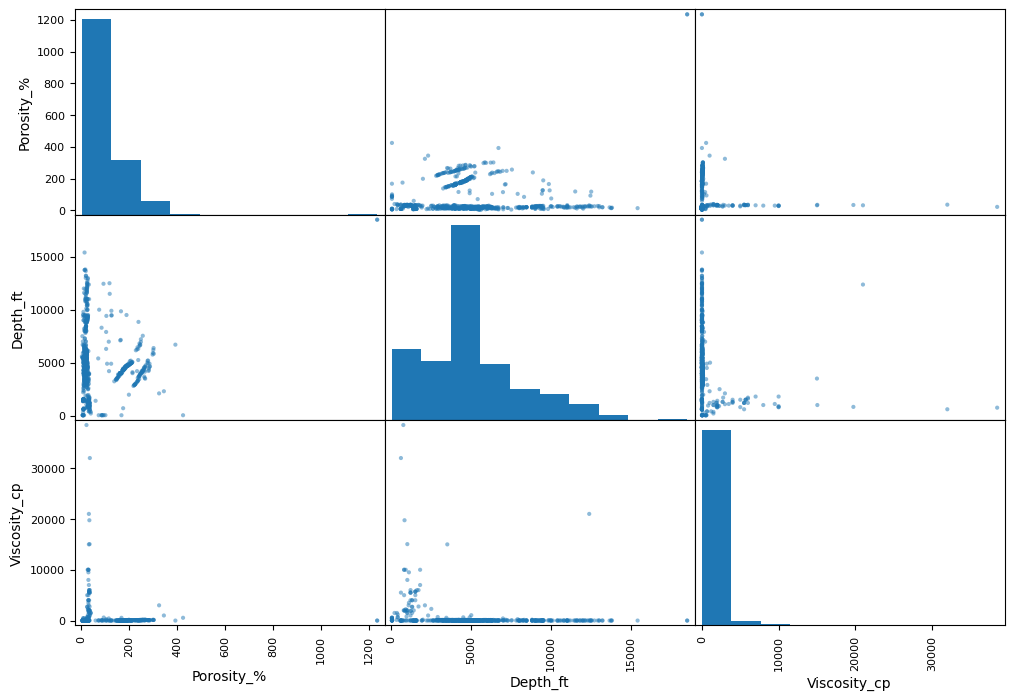

In [28]:

attributes=["Porosity_%","Depth_ft","Viscosity_cp"]
scatter_matrix(df[attributes],figsize=(12,8))

In [29]:
from sklearn.impute import SimpleImputer
Imputer=SimpleImputer(strategy="median")

In [30]:

Imputer.fit_transform(X.drop(columns="Formation "))

array([[4.500e+03, 3.500e+01, 2.700e+03, ..., 1.900e+03, 9.500e+01,
        7.500e+01],
       [3.000e+01, 6.000e+01, 1.000e+00, ..., 6.000e+00, 1.100e+02,
        4.500e+01],
       [1.000e+03, 3.200e+01, 7.500e+02, ..., 1.500e+04, 1.550e+02,
        5.500e+01],
       ...,
       [7.300e+03, 2.460e+01, 1.714e+02, ..., 1.060e+01, 2.630e+02,
        9.600e+01],
       [7.800e+02, 8.900e+00, 1.890e+01, ..., 6.000e-01, 8.200e+01,
        4.600e+01],
       [7.700e+03, 2.310e+01, 1.641e+02, ..., 1.030e+01, 2.590e+02,
        9.400e+01]])

In [31]:
X.dropna()

,Area_acres,Formation,Porosity_%,permeability_md,Depth_ft,Gravity (API),Viscosity_cp,Temprature_F,sat_%_100
0,4500.0,US,35.0,2700.0,850,135.0,1900.0,95.0,75.0
1,30.0,S,60.0,1.0,1400,28.0,6.0,110.0,45.0
2,1000.0,S,32.0,750.0,3500,9.0,15000.0,155.0,55.0
3,550.0,S,32.0,1350.0,12375,125.0,21000.0,91.0,60.0
4,260.0,S,34.0,800.0,825,95.0,19750.0,84.0,55.0
...,...,...,...,...,...,...,...,...,...
755,660.0,LS,7.8,10.2,1360,19.7,0.4,80.0,43.0
756,4840.0,Cong,16.8,114.7,10800,40.2,8.9,245.0,86.0
757,7300.0,Dolo,24.6,171.4,12100,45.2,10.6,263.0,96.0
758,780.0,US,8.9,18.9,1520,19.9,0.6,82.0,46.0


# calculating baseline score for the model

In [32]:
acc_baseline =y_train.value_counts(normalize=True).max()

In [33]:
acc_baseline

0.10714285714285714

# after oversampling and synthetic dta addition in data set 


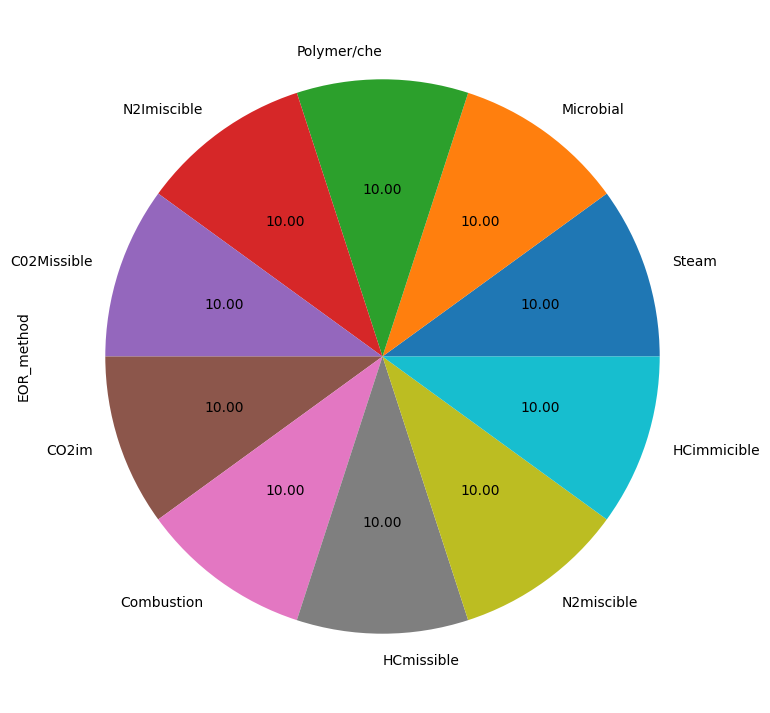

In [34]:
y_oversampled.value_counts().plot.pie(autopct="%.2f", figsize=(9, 9))
plt.show()

# making model

In [35]:
from sklearn.model_selection import cross_validate
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.metrics import make_scorer, f1_score
from imblearn.over_sampling import RandomOverSampler

In [36]:




print(df.columns)

Index(['Area_acres', 'Formation ', 'Porosity_%', 'permeability_md', 'Depth_ft',
       'Gravity (API)', 'Viscosity_cp', 'Temprature_F', 'sat_%_100',
       'EOR_method'],
      dtype='object')


In [37]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.pipeline import make_pipeline

In [38]:
# model_lr=make_pipeline(OneHotEncoder(use_cat_names=True),DecisionTreeClassifier())
# # Fit model to training data
# model_lr.fit(X_train,y_train)
categorical_columns = X_train.select_dtypes(include=['object', 'category'])
categorical_columns = X_train.select_dtypes(include=['object', 'category'])

# Get the indices of the categorical columns
categorical_feature_indices = [
    X_train.columns.get_loc(column) for column in categorical_columns
]
columns_to_scale = X_train.select_dtypes(exclude=["object", "category"])
numerical_column_indices = [0, 2, 3, 4, 5, 6, 7, 8]


In [39]:
categorical_columns.index

Int64Index([ 259,  204,  427,  813,  771,   77,   84,  615,   82,  938,
            ...
             343,  769,  130,  871,   87,  330,  466,  121, 1044,  860],
           dtype='int64', length=756)

In [40]:
df["Formation "]

0          US
1           S
2           S
3           S
4           S
        ...  
755        LS
756      Cong
757      Dolo
758        US
759    Tripol
Name: Formation , Length: 758, dtype: category
Categories (17, object): ['Carb', 'Cong', 'Congl', 'Dolo', ..., 'Sh', 'SorLS-Dolo', 'Tripol', 'US']

#  Applying dimentionality reduction 

In [41]:
from sklearn.preprocessing import StandardScaler

In [42]:
X_train["Formation "].dtype

CategoricalDtype(categories=['Carb', 'Cong', 'Congl', 'Dolo', 'Dolo or S', 'DoloorTripol',
                  'L', 'LS', 'LS or Dolo', 'LSDolo', 'LSorDolo', 'S', 'SS',
                  'Sh', 'SorLS-Dolo', 'Tripol', 'US'],
, ordered=False)

In [43]:
# Specify columns for dtypene-hot encoding and scaling



In [44]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 756 entries, 259 to 860
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   Area_acres       756 non-null    float64 
 1   Formation        756 non-null    category
 2   Porosity_%       756 non-null    float64 
 3   permeability_md  756 non-null    float64 
 4   Depth_ft         756 non-null    int64   
 5   Gravity (API)    756 non-null    float64 
 6   Viscosity_cp     756 non-null    float64 
 7   Temprature_F     756 non-null    float64 
 8   sat_%_100        756 non-null    float64 
dtypes: category(1), float64(7), int64(1)
memory usage: 54.6 KB


# Applying PCA

In [45]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score

# Step 2: Define transformers
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False to get a dense array
scaler = StandardScaler()
pca = PCA(0.95)

# Define the transformations for the ColumnTransformer
transformers = [
    ('encoder', encoder, categorical_feature_indices),
    ('scaler', scaler, numerical_column_indices)
]

# Step 3: Create the ColumnTransformer
column_transformer = ColumnTransformer(transformers, remainder='passthrough')

# Step 4: Create the pipeline with the column transformer, PCA, and the classifier
model_pipeline = make_pipeline(column_transformer, pca, DecisionTreeClassifier())

# Step 5: Fit the model to the training data
model_ds = model_pipeline.fit(X_train, y_train)
cv_scores = cross_val_score(model_ds, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))




Accuracy for each fold: [0.83552632 0.82781457 0.81456954 0.85430464 0.82119205]
Mean Accuracy: 0.8306814220982922


In [46]:
model_ds.score(X_test,y_test)

0.8827160493827161

# Applying hyperparameter optimization

In [47]:
# Step 4: Define the transformers and create the pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have defined categorical_feature_indices, numerical_column_indices, X_train, and y_train

# Step 2: Define transformers
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()
pca = PCA(0.95)

# Step 3: Define search space for hyperparameters
param_grid = {
    'decisiontreeclassifier__max_depth': [None, 5, 10, 15, 20, 25, 30],
    'decisiontreeclassifier__min_samples_split': [2, 5, 10, 15],
    'decisiontreeclassifier__min_samples_leaf': [1, 2, 4],
    'decisiontreeclassifier__max_features': ['sqrt', 'log2', None],
    'decisiontreeclassifier__criterion': ['gini', 'entropy'],
}

# Step 4: Define the transformers and create the pipeline
transformers = [
    ('encoder', encoder, categorical_feature_indices),
    ('scaler', scaler, numerical_column_indices)
]

column_transformer = ColumnTransformer(transformers, remainder='passthrough')

model_pipeline = make_pipeline(column_transformer, pca, DecisionTreeClassifier())

# Step 5: Create the GridSearchCV instance and fit it
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=10,  # Use 10-fold cross-validation
    scoring='accuracy',
    n_jobs=-1,
    verbose=4
)


# Fit the grid search to your data
model_ds=grid_search.fit(X_train, y_train)

# Step 6: Print the best parameters and the mean accuracy
print("Best parameters found:")
print(grid_search.best_params_)
print("Best mean accuracy:", grid_search.best_score_)


Fitting 10 folds for each of 504 candidates, totalling 5040 fits
Best parameters found:
{'decisiontreeclassifier__criterion': 'gini', 'decisiontreeclassifier__max_depth': 30, 'decisiontreeclassifier__max_features': None, 'decisiontreeclassifier__min_samples_leaf': 1, 'decisiontreeclassifier__min_samples_split': 2}
Best mean accuracy: 0.8348245614035088


In [48]:
cv_scores = cross_val_score(model_ds, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print(f"model accuracy score is:{model_ds.score(X_test, y_test)}")

Fitting 10 folds for each of 504 candidates, totalling 5040 fits
Fitting 10 folds for each of 504 candidates, totalling 5040 fits
Fitting 10 folds for each of 504 candidates, totalling 5040 fits
Fitting 10 folds for each of 504 candidates, totalling 5040 fits
Fitting 10 folds for each of 504 candidates, totalling 5040 fits
Accuracy for each fold: [0.82894737 0.7615894  0.76821192 0.83443709 0.82781457]
Mean Accuracy: 0.8042000697107007
model accuracy score is:0.8765432098765432


# Decision Tree model

In [49]:
# model_lr.score(X_test,y_test)

In [50]:
lr_train_acc = accuracy_score(y_train,model_ds.predict(X_train))
lr_val_acc = accuracy_score(y_test,model_ds.predict(X_test)) 

In [51]:
print("training accuracy is:",lr_train_acc)
print("validatoion accuracy:",lr_val_acc)

training accuracy is: 1.0
validatoion accuracy: 0.8765432098765432


In [52]:
 y_pred=model_ds.predict(X_test)

In [53]:
 from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [54]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[23  0  0  0  2  0  0  1  1  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  1  0  0  0  0  0]
 [ 0  0  0 34  1  0  0  2  1  0]
 [ 1  0  0  0 26  0  0  3  0  0]
 [ 1  1  0  0  0 25  4  2  0  0]
 [ 0  0  0  0  0  2 33  3  3  0]
 [ 1  0  0  3  0  1  1 23  0  0]
 [ 0  0  0  0  3  0  0  0 25  0]
 [ 2  0  0  0  0  0  0  0  0 31]]
              precision    recall  f1-score   support

 C02Missible       0.82      0.85      0.84        27
       CO2im       0.97      1.00      0.98        29
  Combustion       1.00      0.97      0.99        36
 HCimmicible       0.92      0.89      0.91        38
  HCmissible       0.79      0.87      0.83        30
   Microbial       0.89      0.76      0.82        33
 N2Imiscible       0.87      0.80      0.84        41
  N2miscible       0.68      0.79      0.73        29
 Polymer/che       0.83      0.89      0.86        28
       Steam       1.00      0.94      0.97        33

    accuracy                           0.88       324
   macro avg       

In [55]:
#Optimization of Decission Tree model Using Byesian technique

In [56]:
import numpy as np

# Assuming cm is the confusion matrix
# Convert cm to a numpy array for easier manipulation
cm = np.array([[6, 0, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 4, 0, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 2, 0, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 1, 0, 0, 0, 0, 0, 0],
               [0, 0, 0, 0, 0, 0, 1, 0, 0, 0],
               [0, 0, 0, 0, 1, 0, 0, 0, 0, 0],
               [1, 0, 0, 0, 0, 0, 5, 0, 0, 1],
               [0, 0, 2, 0, 0, 0, 0, 9, 2, 0],
               [0, 0, 0, 0, 0, 0, 1, 1, 3, 0],
               [0, 0, 0, 0, 0, 0, 0, 0, 0, 0]])

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class
TP = np.diag(cm)
TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - TP)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

# Print the true/false values for each class
for i in range(len(TP)):
    print(f"Class {i} - TP: {TP[i]}, TN: {TN[i]}, FP: {FP[i]}, FN: {FN[i]}")


Class 0 - TP: 6, TN: 33, FP: 1, FN: 0
Class 1 - TP: 4, TN: 36, FP: 0, FN: 0
Class 2 - TP: 2, TN: 36, FP: 2, FN: 0
Class 3 - TP: 1, TN: 39, FP: 0, FN: 0
Class 4 - TP: 0, TN: 38, FP: 1, FN: 1
Class 5 - TP: 0, TN: 39, FP: 0, FN: 1
Class 6 - TP: 5, TN: 31, FP: 2, FN: 2
Class 7 - TP: 9, TN: 26, FP: 1, FN: 4
Class 8 - TP: 3, TN: 33, FP: 2, FN: 2
Class 9 - TP: 0, TN: 39, FP: 1, FN: 0


In [57]:
print(accuracy_score(y_test,y_pred))

0.8765432098765432


# new Data 

In [95]:
new_data1 = pd.DataFrame({
    'Area_acres': ['4360.0'],
    'Formation ': ['LS'],
    'Porosity_%': [6],
    'permeability_md': ['2'],
    'Depth_ft': [6700.0],
    'Gravity (API)': ['53.0'],
    'Viscosity_cp': ['15000.0'],
    'Temprature_F': ['155.0'],
    'sat_%_100': ['55'],
})
new_data2 = pd.DataFrame({
    'Area_acres': ['800.0'],
    'Formation ': ['S'],
    'Porosity_%': [32.0],
    'permeability_md': ['75.0'],
    'Depth_ft': [6700.0],
    'Gravity (API)': ['32.0'],
    'Viscosity_cp': ['1'],
    'Temprature_F': ['107'],
    'sat_%_100': ['39'],
})

In [96]:


prediction_1=model_ds.predict(new_data1)
prediction_2=model_ds.predict(new_data2)

In [97]:
prediction_df1 = pd.DataFrame({'Prediction1': prediction_1,"prediction2":prediction_2})
print(prediction_df1)

  Prediction1 prediction2
0       Steam       CO2im


# Random Forest

In [98]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

# Assuming you have defined categorical_feature_indices, numerical_column_indices, X_train, and y_train

# Step 2: Define transformers
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
scaler = StandardScaler()
pca = PCA(0.95)

# Step 3: Define search space for hyperparameters
param_grid = {
    'randomforestclassifier__n_estimators': [100],
    'randomforestclassifier__max_depth': [None, 10,20],  # Reduce the range of max_depth
    'randomforestclassifier__min_samples_split': [2, 5],
    'randomforestclassifier__min_samples_leaf': [1],
    'randomforestclassifier__max_features': ['sqrt'],  # Set max_features explicitly to 'sqrt'
    'randomforestclassifier__criterion': ['gini'],  # Try one criterion first
}

# Step 4: Define the transformers and create the pipeline
transformers = [
    ('encoder', encoder, categorical_feature_indices),
    ('scaler', scaler, numerical_column_indices)
]

column_transformer = ColumnTransformer(transformers, remainder='passthrough')

model_pipeline = make_pipeline(column_transformer, pca, RandomForestClassifier())

# Step 5: Create the GridSearchCV instance and fit it
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,  # Use all available CPU cores
    verbose=4
)

# Fit the grid search to your data
model_rf=grid_search.fit(X_train, y_train)

# Step 6: Print the best parameters and the mean accuracy
print("Best parameters found:")
print(grid_search.best_params_)
print("Best mean accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Best parameters found:
{'randomforestclassifier__criterion': 'gini', 'randomforestclassifier__max_depth': 20, 'randomforestclassifier__max_features': 'sqrt', 'randomforestclassifier__min_samples_leaf': 1, 'randomforestclassifier__min_samples_split': 2, 'randomforestclassifier__n_estimators': 100}
Best mean accuracy: 0.8650313698152665


In [99]:
 y_pred_rf=model_rf.predict(X_test)
print(confusion_matrix(y_test,y_pred_rf))
print(classification_report(y_test,y_pred_rf))

[[24  0  0  0  2  1  0  0  0  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 35  1  0  0  0  0  0  0]
 [ 0  0  0 35  0  0  0  3  0  0]
 [ 0  0  0  0 28  0  0  1  1  0]
 [ 0  1  0  0  0 28  2  2  0  0]
 [ 1  0  1  0  3  0 31  4  1  0]
 [ 0  0  0  2  0  0  1 26  0  0]
 [ 1  0  0  0  1  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

 C02Missible       0.92      0.89      0.91        27
       CO2im       0.97      1.00      0.98        29
  Combustion       0.97      0.97      0.97        36
 HCimmicible       0.92      0.92      0.92        38
  HCmissible       0.82      0.93      0.87        30
   Microbial       0.97      0.85      0.90        33
 N2Imiscible       0.91      0.76      0.83        41
  N2miscible       0.72      0.90      0.80        29
 Polymer/che       0.93      0.93      0.93        28
       Steam       1.00      1.00      1.00        33

    accuracy                           0.91       324
   macro avg       

In [100]:
import numpy as np

# Assuming cm is the confusion matrix
# Convert cm to a numpy array for easier manipulation
cm = np.array([[20, 0, 0, 0, 2, 1, 0, 3, 1, 0],
 [0, 29, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 34, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 37, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 29, 0, 0, 0, 1, 0],
 [0, 3, 0, 0, 0, 22, 7, 1, 0, 0],
 [0, 0, 1, 0, 2, 0, 34, 3, 1, 0],
 [1, 0, 0, 1, 0, 0, 1, 26, 0, 0],
 [0, 1, 0, 0, 2, 0, 0, 0, 25, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 33]]
)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class
TP = np.diag(cm)
TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - TP)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

# Print the true/false values for each class
for i in range(len(TP)):
    print(f"Class {i} - TP: {TP[i]}, TN: {TN[i]}, FP: {FP[i]}, FN: {FN[i]}")


Class 0 - TP: 20, TN: 296, FP: 1, FN: 7
Class 1 - TP: 29, TN: 291, FP: 4, FN: 0
Class 2 - TP: 34, TN: 287, FP: 1, FN: 2
Class 3 - TP: 37, TN: 285, FP: 1, FN: 1
Class 4 - TP: 29, TN: 288, FP: 6, FN: 1
Class 5 - TP: 22, TN: 290, FP: 1, FN: 11
Class 6 - TP: 34, TN: 275, FP: 8, FN: 7
Class 7 - TP: 26, TN: 287, FP: 8, FN: 3
Class 8 - TP: 25, TN: 291, FP: 5, FN: 3
Class 9 - TP: 33, TN: 291, FP: 0, FN: 0


In [101]:
# Perform cross-validation
cv_scores = cross_val_score(model_rf, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
print(f"model accuracy score is:{model_rf.score(X_test, y_test)}")


Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Fitting 5 folds for each of 6 candidates, totalling 30 fits
Accuracy for each fold: [0.90131579 0.80794702 0.78807947 0.86754967 0.90066225]
Mean Accuracy: 0.8531108400139422
model accuracy score is:0.9104938271604939


# making model Using RandomForest

In [102]:
RF_train_acc = accuracy_score(y_train,model_rf.predict(X_train))
RF_val_acc = accuracy_score(y_test,model_rf.predict(X_test))

In [103]:
print(RF_train_acc)
print(RF_val_acc)

1.0
0.9104938271604939


# new data for Random forest

In [104]:
new_data1 = pd.DataFrame({
    'Area_acres': ['4360.0'],
    'Formation ': ['LS'],
    'Porosity_%': [6],
    'permeability_md': ['2'],
    'Depth_ft': [6700.0],
    'Gravity (API)': ['53.0'],
    'Viscosity_cp': ['15000.0'],
    'Temprature_F': ['155.0'],
    'sat_%_100': ['55'],
})
new_data2 = pd.DataFrame({
    'Area_acres': ['800.0'],
    'Formation ': ['S'],
    'Porosity_%': [32.0],
    'permeability_md': ['75.0'],
    'Depth_ft': [6700.0],
    'Gravity (API)': ['32.0'],
    'Viscosity_cp': ['1'],
    'Temprature_F': ['107'],
    'sat_%_100': ['39'],
})

# predicting

In [105]:

prediction_1=model_rf.predict(new_data1)
prediction_2=model_rf.predict(new_data2)

In [106]:
prediction_df1 = pd.DataFrame({'Prediction1': prediction_1,"prediction2":prediction_2})
print(prediction_df1)

  Prediction1  prediction2
0       Steam  C02Missible


# KNN

In [71]:
# Creating model of X-Gboost
from sklearn.neighbors import KNeighborsClassifier


In [72]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Assuming you have defined categorical_feature_indices, numerical_column_indices, X_train, and y_train

# Step 2: Define transformers
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)  # sparse=False to get a dense array
scaler = StandardScaler()
pca = PCA(0.95)

# Define the transformations for the ColumnTransformer
transformers = [
    ('encoder', encoder, categorical_feature_indices),
    ('scaler', scaler, numerical_column_indices)
]

# Step 3: Create the ColumnTransformer
column_transformer = ColumnTransformer(transformers, remainder='passthrough')

# Step 4: Create the pipeline with the column transformer, PCA, and the classifier
model_pipeline = make_pipeline(column_transformer, pca, KNeighborsClassifier())

# Define a parameter grid for KNN hyperparameters
param_grid = {
    'kneighborsclassifier__n_neighbors': [3, 5, 7],  # Number of neighbors to consider
    'kneighborsclassifier__weights': ['uniform', 'distance'],  # Weighting scheme
    'kneighborsclassifier__metric': ['euclidean', 'manhattan'],  # Distance metric
}

# Create the GridSearchCV instance
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=4
)

# Fit the grid search to your data
model_Knn=grid_search.fit(X_train, y_train)

# Print the best parameters and the mean accuracy
print("Best parameters found:")
print(grid_search.best_params_)
print("Best mean accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 12 candidates, totalling 60 fits
Best parameters found:
{'kneighborsclassifier__metric': 'manhattan', 'kneighborsclassifier__n_neighbors': 3, 'kneighborsclassifier__weights': 'distance'}
Best mean accuracy: 0.8531631230393867


In [73]:
cv_scores = cross_val_score(model_Knn, X_train, y_train, cv=5, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))

print(f"Accuracy score is{model_Knn.score(X_test,y_test)}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Fitting 5 folds for each of 12 candidates, totalling 60 fits
Accuracy for each fold: [0.86184211 0.83443709 0.79470199 0.88741722 0.8807947 ]
Mean Accuracy: 0.8518386197281282
Accuracy score is0.8981481481481481


In [74]:
lr_train_acc = accuracy_score(y_train,model_Knn.predict(X_train))
lr_val_acc = accuracy_score(y_test,model_Knn.predict(X_test))

In [75]:
print(lr_train_acc) 
print(lr_val_acc)

1.0
0.8981481481481481


In [76]:
prediction_1=model_Knn.predict(new_data1)
prediction_2=model_Knn.predict(new_data2)

In [77]:
print(f"prediction_1 is{prediction_1}and prediction_2 is {prediction_2}")

prediction_1 is['Steam']and prediction_2 is ['N2Imiscible']


In [78]:
y_pred_Knn=model_Knn.predict(X_test)
print(confusion_matrix(y_test,y_pred_Knn))
print(classification_report(y_test,y_pred_Knn))

[[18  0  0  1  3  1  0  3  1  0]
 [ 0 29  0  0  0  0  0  0  0  0]
 [ 0  0 35  0  0  0  0  0  1  0]
 [ 0  0  0 36  0  0  0  2  0  0]
 [ 0  0  0  0 28  1  0  0  1  0]
 [ 0  4  0  0  0 26  2  1  0  0]
 [ 0  0  1  1  0  1 34  4  0  0]
 [ 0  0  0  1  0  1  1 26  0  0]
 [ 0  1  0  0  1  0  0  0 26  0]
 [ 0  0  0  0  0  0  0  0  0 33]]
              precision    recall  f1-score   support

 C02Missible       1.00      0.67      0.80        27
       CO2im       0.85      1.00      0.92        29
  Combustion       0.97      0.97      0.97        36
 HCimmicible       0.92      0.95      0.94        38
  HCmissible       0.88      0.93      0.90        30
   Microbial       0.87      0.79      0.83        33
 N2Imiscible       0.92      0.83      0.87        41
  N2miscible       0.72      0.90      0.80        29
 Polymer/che       0.90      0.93      0.91        28
       Steam       1.00      1.00      1.00        33

    accuracy                           0.90       324
   macro avg       

In [79]:
import numpy as np

# Assuming cm is the confusion matrix
# Convert cm to a numpy array for easier manipulation
cm = np.array([[20, 0, 0, 0, 1, 0, 0, 4, 2, 0],
 [0, 29, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 34, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 37, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 29, 0, 0, 0, 1, 0],
 [0, 4, 0, 0, 0, 21, 5, 3, 0, 0],
 [0, 0, 2, 0, 0, 0, 35, 4, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 27, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 25, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 33]]
)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class
TP = np.diag(cm)
TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - TP)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

# Print the true/false values for each class
for i in range(len(TP)):
    print(f"Class {i} - TP: {TP[i]}, TN: {TN[i]}, FP: {FP[i]}, FN: {FN[i]}")


Class 0 - TP: 20, TN: 297, FP: 0, FN: 7
Class 1 - TP: 29, TN: 290, FP: 5, FN: 0
Class 2 - TP: 34, TN: 286, FP: 2, FN: 2
Class 3 - TP: 37, TN: 285, FP: 1, FN: 1
Class 4 - TP: 29, TN: 292, FP: 2, FN: 1
Class 5 - TP: 21, TN: 290, FP: 1, FN: 12
Class 6 - TP: 35, TN: 277, FP: 6, FN: 6
Class 7 - TP: 27, TN: 283, FP: 12, FN: 2
Class 8 - TP: 25, TN: 291, FP: 5, FN: 3
Class 9 - TP: 33, TN: 291, FP: 0, FN: 0


In [80]:
# You can now use the formatted confusion matrix string as needed



# XGboost MOdel

In [81]:
import xgboost as xgb

In [82]:
import numpy as np

# Assuming your target variable is stored in the variable 'y'
classes = np.unique(y_oversampled)
num_classes = len(classes)

print("Number of classes:", num_classes)


Number of classes: 10


In [110]:
from sklearn.preprocessing import LabelEncoder
# Giving categorical target variables numeric labels
label_encoder = LabelEncoder()
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)
num_classes = len(label_encoder.classes_)

In [ ]:
from sklearn.model_selection import GridSearchCV
import xgboost as xgb
from sklearn.preprocessing import OneHotEncoder
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.compose import ColumnTransformer

# Assuming you have defined categorical_feature_indices, numerical_column_indices, X_train, y_train_encoded, and label_encoder

# Step 2: Define transformers
encoder = OneHotEncoder(handle_unknown='ignore')
pca = PCA(0.95)

# Define the transformations for the ColumnTransformer
transformers = [
    ('encoder', encoder, categorical_feature_indices),
    ('pca', pca, numerical_column_indices)
]

# Step 3: Create the ColumnTransformer
column_transformer = ColumnTransformer(transformers, remainder='passthrough')

# Step 4: Create the pipeline with the column transformer, PCA, and the XGBoost classifier
model_pipeline = make_pipeline(column_transformer, xgb.XGBClassifier(n_estimators=500,objective='multi:softmax', num_class=len(label_encoder.classes_), random_state=0))

# Define a parameter grid for XGBoost hyperparameters
param_grid = {
    'xgbclassifier__n_estimators': [100, 200, 300],
    'xgbclassifier__max_depth': [3, 4, 5],
    'xgbclassifier__learning_rate': [0.1, 0.01],
}

# Create the GridSearchCV instance
grid_search = GridSearchCV(
    estimator=model_pipeline,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=4
)

# Fit the grid search to your data
model_xgb=grid_search.fit(X_train, y_train_encoded)

# Print the best parameters and the mean accuracy
print("Best parameters found:")
print(grid_search.best_params_)
print("Best mean accuracy:", grid_search.best_score_)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


In [ ]:
# dont gorget to use the encoded values otherwise will get zero score

In [ ]:
# Perform cross-validation
cv_scores = cross_val_score(model_xgb, X_train, y_train_encoded, cv=5, scoring='accuracy')

# Print the accuracy for each fold and the mean accuracy
print("Accuracy for each fold:", cv_scores)
print("Mean Accuracy:", np.mean(cv_scores))
XGB_train_acc = accuracy_score(y_train_encoded,model_xgb.predict(X_train))
XGB_val_acc = accuracy_score(y_test_encoded,model_xgb.predict(X_test))

In [ ]:
print(XGB_train_acc)
print(XGB_val_acc)

In [ ]:
#this will give us numeric predicted values
prediction_XGB1=model_xgb.predict(new_data1)
prediction_XGB2=model_xgb.predict(new_data2)

In [ ]:
print(f"predictions are {prediction_XGB1}and {prediction_XGB2}")

In [ ]:
# Convert the predicted numeric labels back to the original class labels
y_pred1 = label_encoder.inverse_transform(prediction_XGB1)
y_pred2=label_encoder.inverse_transform(prediction_XGB2)

In [ ]:
print(f"predictions are {y_pred1}and {y_pred2}")

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report, f1_score, recall_score

# Assuming you have already trained your model (model_xgb) and made predictions on the test set
y_pred = model_xgb.predict(X_test)

# Calculate the confusion matrix
conf_matrix = confusion_matrix(y_test_encoded, y_pred)
print("Confusion Matrix:")
print(conf_matrix)

# Calculate the classification report, including precision, recall, and F1-score
class_report = classification_report(y_test_encoded, y_pred)
print("Classification Report:")
print(class_report)

# Calculate the F1 score
f1 = f1_score(y_test_encoded, y_pred, average='weighted')  # You can specify the averaging strategy
print("Weighted F1 Score:", f1)

# Calculate the recall (sensitivity)
recall = recall_score(y_test_encoded, y_pred, average='weighted')  # You can specify the averaging strategy
print("Weighted Recall (Sensitivity):", recall)


In [ ]:
import numpy as np

# Assuming cm is the confusion matrix
# Convert cm to a numpy array for easier manipulation
cm = np.array([[16,  3,  0,  0,  0,  0,  2,  2,  4,  0],
 [ 0, 29,  0,  0,  0,  0,  0,  0,  0,  0],
 [ 0,  4, 26,  0,  0,  0,  0,  0,  3,  3],
 [ 0,  0,  0, 32,  0,  0,  1,  5,  0,  0],
 [ 0,  0,  0,  0, 29,  0,  0,  0,  1,  0],
 [ 0,  0,  0,  0,  0, 23,  7,  3,  0,  0],
 [ 2,  0,  0,  0,  0,  0, 34,  5,  0,  0],
 [ 1,  0,  1,  3,  0,  3,  1, 20,  0,  0],
 [ 1,  1,  1,  0,  0,  0,  0,  0, 25,  0],
 [ 0,  0,  0,  0,  0,  0,  0,  0,  2, 31]]
)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class
TP = np.diag(cm)
TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - TP)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

# Print the true/false values for each class
for i in range(len(TP)):
    print(f"Class {i} - TP: {TP[i]}, TN: {TN[i]}, FP: {FP[i]}, FN: {FN[i]}")


In [ ]:
import pandas as pd
y_pred_xgb = pd.Series(y_pred)

In [109]:
import numpy as np

# Assuming cm is the confusion matrix
# Convert cm to a numpy array for easier manipulation
cm = np.array([[20, 0, 0, 0, 1, 0, 0, 4, 2, 0],
 [0, 29, 0, 0, 0, 0, 0, 0, 0, 0],
 [0, 0, 34, 0, 0, 0, 0, 0, 2, 0],
 [0, 0, 0, 37, 0, 0, 0, 1, 0, 0],
 [0, 0, 0, 0, 29, 0, 0, 0, 1, 0],
 [0, 4, 0, 0, 0, 21, 5, 3, 0, 0],
 [0, 0, 2, 0, 0, 0, 35, 4, 0, 0],
 [0, 0, 0, 1, 0, 0, 1, 27, 0, 0],
 [0, 1, 0, 0, 1, 1, 0, 0, 25, 0],
 [0, 0, 0, 0, 0, 0, 0, 0, 0, 33]]
)

# Calculate true positives (TP), true negatives (TN), false positives (FP), and false negatives (FN) for each class
TP = np.diag(cm)
TN = np.sum(cm) - (np.sum(cm, axis=0) + np.sum(cm, axis=1) - TP)
FP = np.sum(cm, axis=0) - TP
FN = np.sum(cm, axis=1) - TP

# Print the true/false values for each class
for i in range(len(TP)):
    print(f"Class {i} - TP: {TP[i]}, TN: {TN[i]}, FP: {FP[i]}, FN: {FN[i]}")


Class 0 - TP: 20, TN: 297, FP: 0, FN: 7
Class 1 - TP: 29, TN: 290, FP: 5, FN: 0
Class 2 - TP: 34, TN: 286, FP: 2, FN: 2
Class 3 - TP: 37, TN: 285, FP: 1, FN: 1
Class 4 - TP: 29, TN: 292, FP: 2, FN: 1
Class 5 - TP: 21, TN: 290, FP: 1, FN: 12
Class 6 - TP: 35, TN: 277, FP: 6, FN: 6
Class 7 - TP: 27, TN: 283, FP: 12, FN: 2
Class 8 - TP: 25, TN: 291, FP: 5, FN: 3
Class 9 - TP: 33, TN: 291, FP: 0, FN: 0
